# [Monty Hall problem](http://www.montyhallproblem.com/)

Behind 3 doors, there 2 goats, and a car. After you choose one of the doors, Monty Hall reveals a goat behind one the rest 2 doors: Do you swap?

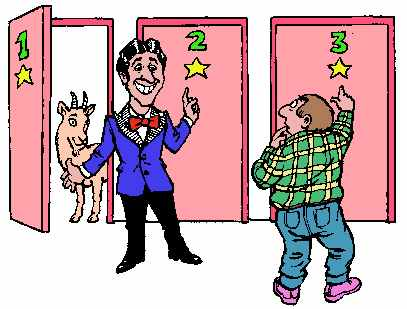

In [8]:
from IPython.display import Image
Image("mainimage.jpg")

# Simulation begins

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [10]:
ntimes = 1000
N = 5000
prizeGet = []
for jj in range(N):
    #print(jj,end=', ')
    result = {'change':[],'prize':[]}
    for ii in range(ntimes):
        # setting up
        change = np.array(['swap','not swap'])
        doors = ['goat','goat','car']
        # make a choice
        doors = random.sample(doors,len(doors))
        condition = np.random.choice(change,size=1,p=[0.5,0.5])[0]# do I swap?
        doorChosen = np.random.randint(0,3,size=1)[0]# which door to choose?
        
        if condition == 'not swap':
            prize = doors[doorChosen]
        else:
            # given the door you have chosen, take it our from the rest of choices
            doors = np.delete(doors,doorChosen)
            idx = np.where(doors =="goat")[0][0]# index of the door Monty Hall reveal a goat behind it
            if idx == 0:
                prize = doors[1]
            else:
                prize = doors[0]
        result['change'].append(condition)
        result['prize'].append(prize)
    result = pd.DataFrame(result)
    df=pd.DataFrame({'p' : result.groupby('change')['prize'].value_counts()}).reset_index()
    df['p']=df['p']/df['p'].sum()
    df['ratio']=(df[(df['change']=='swap')&(df['prize']=='car')]['p'].values/df[(df['change']=='not swap')&(df['prize']=='car')]['p'].values)[0]
    prizeGet.append(df)

# Putting everything together

In [11]:
sim = pd.concat(prizeGet)
sim = sim[sim['prize']=='car']


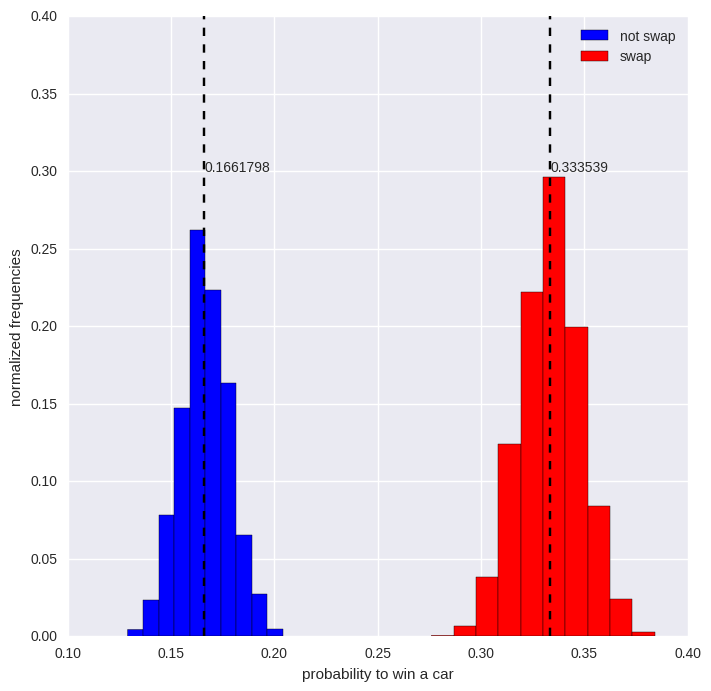

In [20]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
d = sim[sim['change']=='not swap']['p'].values
weights = np.ones_like(d)/float(len(d))
_=ax.hist(d,weights=weights,color='blue',label='not swap')
_=ax.axvline(d.mean(),color='k',linestyle='--')
_=ax.annotate(d.mean(),xy=(d.mean(),ax.get_ylim()[1]))
d = sim[sim['change']=='swap']['p'].values
weights = np.ones_like(d)/float(len(d))
_=ax.hist(d,weights=weights,color='red',label='swap')
_=ax.set(xlabel='probability to win a car',ylabel='normalized frequencies')
_=ax.axvline(d.mean(),color='k',linestyle='--')
_=ax.annotate(d.mean(),xy=(d.mean(),ax.get_ylim()[1]))
_=ax.legend()
_=ax.set(ylim=(0,0.4))

Plotting the raw count of the chance to win the car if I swap or not. Very obvious that there are two distributions: one centers around 0.15-0.17 (swap), and the other centers around 0.33-0.35(not swap).

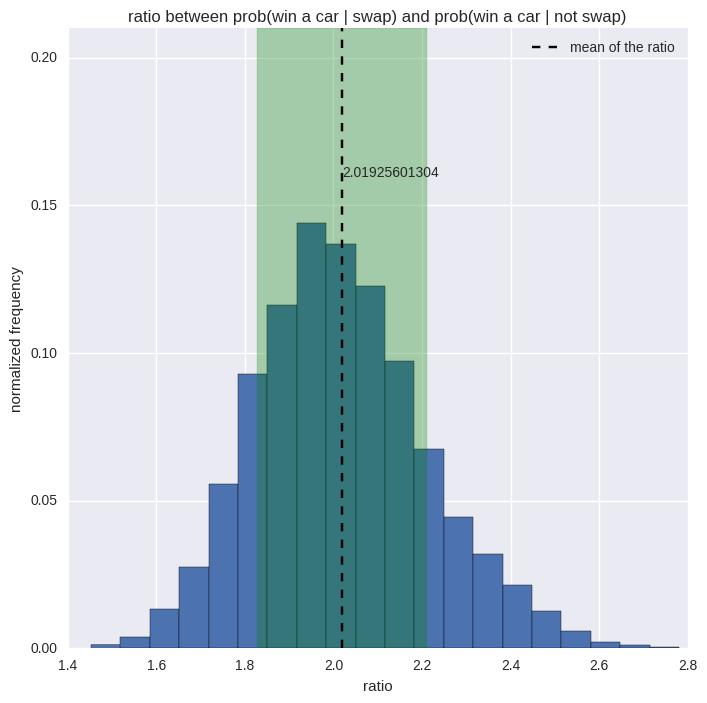

In [24]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
d = sim['ratio'].values
weights = np.ones_like(d)/float(len(d))
_=ax.hist(d,bins=20,weights=weights)
_=ax.axvline(d.mean(),color='k',linestyle='--',label='mean of the ratio')
_=ax.axvspan(d.mean()-d.std(),d.mean()+d.std(),color='green',alpha=0.3)
_=ax.annotate(d.mean(),xy=(d.mean(),ax.get_ylim()[1]))
_=ax.set(xlabel='ratio',ylabel='normalized frequency',ylim=(0,ax.get_ylim()[1]+0.05),
         title='ratio between prob(win a car | swap) and prob(win a car | not swap)')
_=ax.legend()

As you see, our simulation shows the ratio between the probability of winning a car if we swap to the probability of winning a car if we don't swap is very close to 2, which means if we swap, we should have 2 times of chance to win a car in long run. 

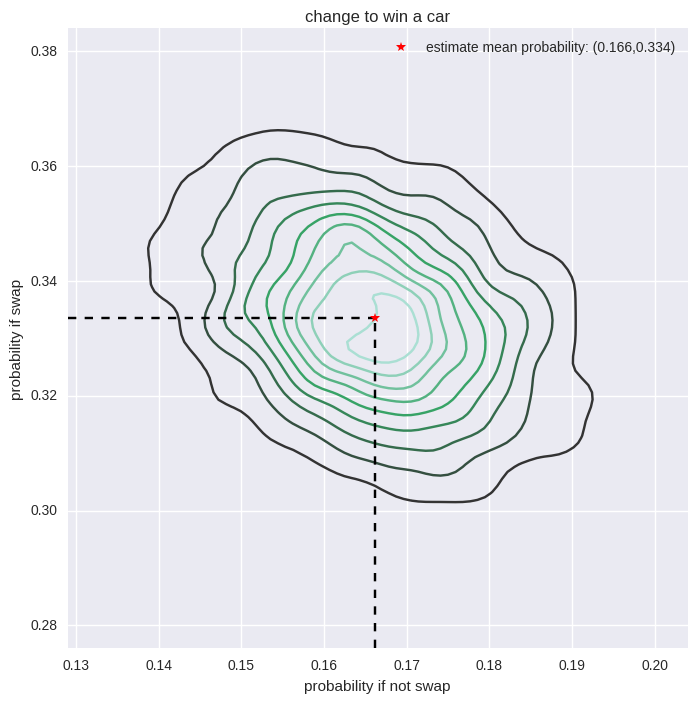

In [14]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax = sns.kdeplot(sim[sim['change']=='not swap']['p'],sim[sim['change']=='swap']['p'])
_=ax.plot(sim[sim['change']=='not swap']['p'].mean(),sim[sim['change']=='swap']['p'].mean(),'r*',
          label='estimate mean probability: (%.3f,%.3f)'%(sim[sim['change']=='not swap']['p'].mean(),
                                                          sim[sim['change']=='swap']['p'].mean()))
_=ax.vlines(sim[sim['change']=='not swap']['p'].mean(),ymin=sim[sim['change']=='swap']['p'].min(),
            ymax=sim[sim['change']=='swap']['p'].mean(),
            color='k',linestyle='--')
_=ax.hlines(sim[sim['change']=='swap']['p'].mean(),xmin=sim[sim['change']=='not swap']['p'].min(),
            xmax=sim[sim['change']=='not swap']['p'].mean(),
            color='k',linestyle='--')
_=ax.set(xlabel='probability if not swap',ylabel='probability if swap',title='change to win a car',
        xlim=(sim[sim['change']=='not swap']['p'].min(),sim[sim['change']=='not swap']['p'].max()),
         ylim=(sim[sim['change']=='swap']['p'].min(),sim[sim['change']=='swap']['p'].max()))
_=ax.legend()


# [Mathematical solution](https://www.youtube.com/watch?v=mhlc7peGlGg)


|               | swap           | not swap  |
| ------------- |:--------------:| ---------:|
| win a car     | 0.66           |  0.33     |
| win a goat    | 0.33           |  0.66     |


In the case of not swap:
1. If you choose the right door behind which is a car, the chance is 33%
2. If you choose the wrong door behind which is a goat, the chance is 66%
3. After Monty Hall shows a door, the chance to choose the right door is not change, because we don't swap

In the case of swap:
1. If you choose the right door behind which is a car, and you swap to a goat door, the chance is 33%, and you win a goat
2. If you choose the wrong door behind which is a goat, and you swap to another door (must be a car because you choose a goat and Monty choose the other goat), the chance is 66% because there are two goats to choose, and you win a car
3. You obviously have a high chance to win the car is you swap. 

Always choose accordingly if parameters change!!